In [5]:
from google.colab import files
files.upload()

Saving synthetic_financial_data.csv to synthetic_financial_data (1).csv
Saving US_Cities.xlsx to US_Cities (1).xlsx


{'synthetic_financial_data (1).csv': b'transaction_id,customer_id,merchant_id,amount,transaction_time,is_fraudulent,card_type,location,purchase_category,customer_age,transaction_description\n1,1082,2027,5758.59,2023-01-01 00:00:00,0,MasterCard,City-30,Gas Station,43,Purchase at Merchant-2027\n2,1015,2053,1901.56,2023-01-01 00:00:01,1,Visa,City-47,Online Shopping,61,Purchase at Merchant-2053\n3,1004,2035,1248.86,2023-01-01 00:00:02,1,MasterCard,City-6,Gas Station,57,Purchase at Merchant-2035\n4,1095,2037,7619.05,2023-01-01 00:00:03,1,Discover,City-6,Travel,59,Purchase at Merchant-2037\n5,1036,2083,1890.1,2023-01-01 00:00:04,1,MasterCard,City-34,Retail,36,Purchase at Merchant-2083\n6,1032,2021,8487.68,2023-01-01 00:00:05,1,American Express,City-1,Gas Station,43,Purchase at Merchant-2021\n7,1029,2033,7565.3,2023-01-01 00:00:06,1,Visa,City-7,Online Shopping,19,Purchase at Merchant-2033\n8,1018,2088,2284.88,2023-01-01 00:00:07,0,American Express,City-46,Travel,40,Purchase at Merchant-2088\n

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [12]:
city_summary = pd.read_csv("synthetic_financial_data.csv")
city_summary = pd.read_excel("US_Cities.xlsx")

In [13]:
city_map = {
    'City-1': 'New York', 'City-2': 'Los Angeles', 'City-3': 'Chicago',
    'City-4': 'Houston', 'City-5': 'Phoenix', 'City-6': 'Philadelphia',
    'City-7': 'San Antonio', 'City-8': 'San Diego', 'City-9': 'Dallas',
    'City-10': 'Austin', 'City-11': 'Jacksonville', 'City-12': 'San Jose',
    'City-13': 'Fort Worth', 'City-14': 'Columbus', 'City-15': 'Charlotte',
    'City-16': 'New York', 'City-17': 'Los Angeles', 'City-18': 'Chicago',
    'City-19': 'Houston', 'City-20': 'Phoenix', 'City-21': 'Philadelphia',
    'City-22': 'San Antonio', 'City-23': 'San Diego', 'City-24': 'Dallas',
    'City-25': 'Austin', 'City-26': 'Jacksonville', 'City-27': 'San Jose',
    'City-28': 'Fort Worth', 'City-29': 'Columbus', 'City-30': 'Charlotte',
    'City-31': 'New York', 'City-32': 'Los Angeles', 'City-33': 'Chicago',
    'City-34': 'Houston', 'City-35': 'Phoenix', 'City-36': 'Philadelphia',
    'City-37': 'San Antonio', 'City-38': 'San Diego', 'City-39': 'Dallas',
    'City-40': 'Austin', 'City-41': 'Jacksonville', 'City-42': 'San Jose',
    'City-43': 'Fort Worth', 'City-44': 'Columbus', 'City-45': 'Charlotte',
    'City-46': 'New York', 'City-47': 'Los Angeles'
}


city_summary['city'] = city_summary['location'].map(city_map)
city_summary = city_summary[city_summary['city'].notna()]

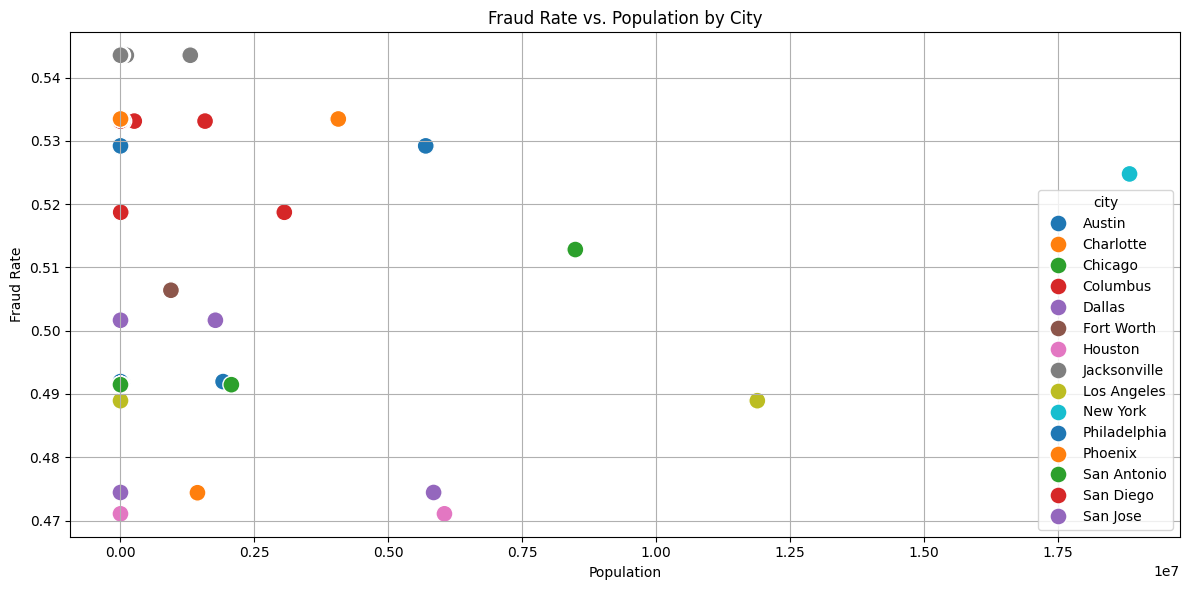

In [14]:
city_summary = city_summary.groupby('city').agg(
    total_transactions=('is_fraudulent', 'count'),
    total_frauds=('is_fraudulent', 'sum')
).reset_index()

city_summary['city'] = city_summary['city'].str.strip()
city_summary = pd.merge(city_summary, city_summary[['city', 'population']], on='city', how='left')
city_summary['fraud_rate'] = city_summary['total_frauds'] / city_summary['total_transactions']
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=city_summary,
    x='population', y='fraud_rate', hue='city',
    palette='tab10', s=150
)
plt.title("Fraud Rate vs. Population by City")
plt.xlabel("Population")
plt.ylabel("Fraud Rate")
plt.grid(True)
plt.tight_layout()
plt.show()


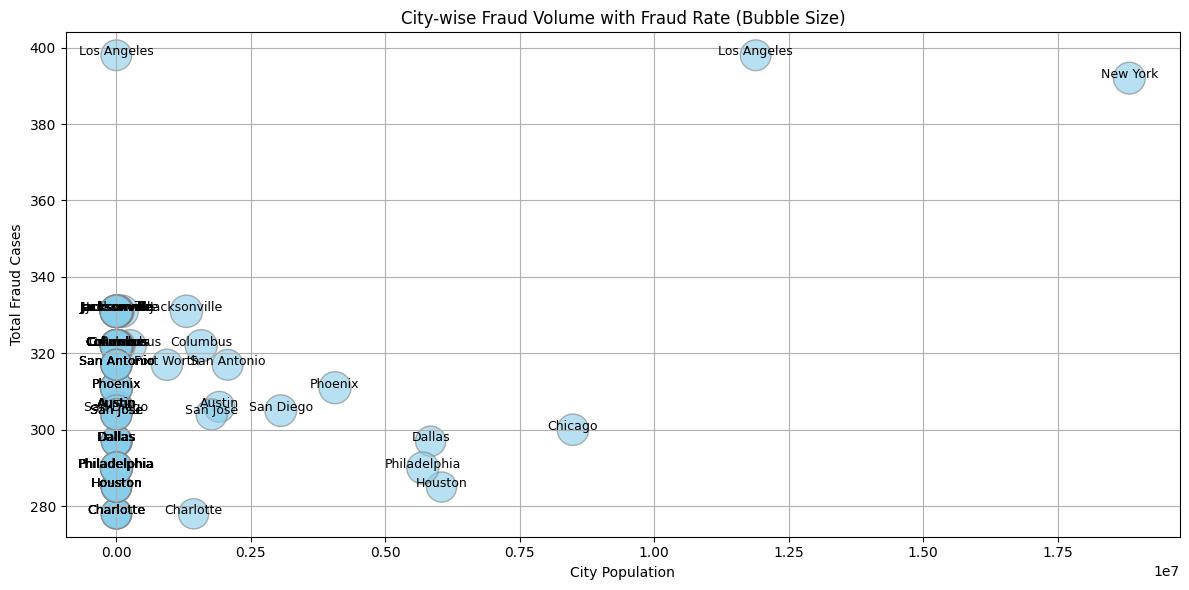

In [15]:
plt.figure(figsize=(12, 6))
bubble = plt.scatter(
    city_summary['population'], city_summary['total_frauds'],
    s=city_summary['fraud_rate'] * 1000, alpha=0.6, c='skyblue', edgecolors='gray', linewidth=1
)
for i, row in city_summary.iterrows():
    plt.text(row['population'], row['total_frauds'], row['city'], fontsize=9, ha='center')
plt.xlabel('City Population')
plt.ylabel('Total Fraud Cases')
plt.title('City-wise Fraud Volume with Fraud Rate (Bubble Size)')
plt.grid(True)
plt.tight_layout()
plt.show()

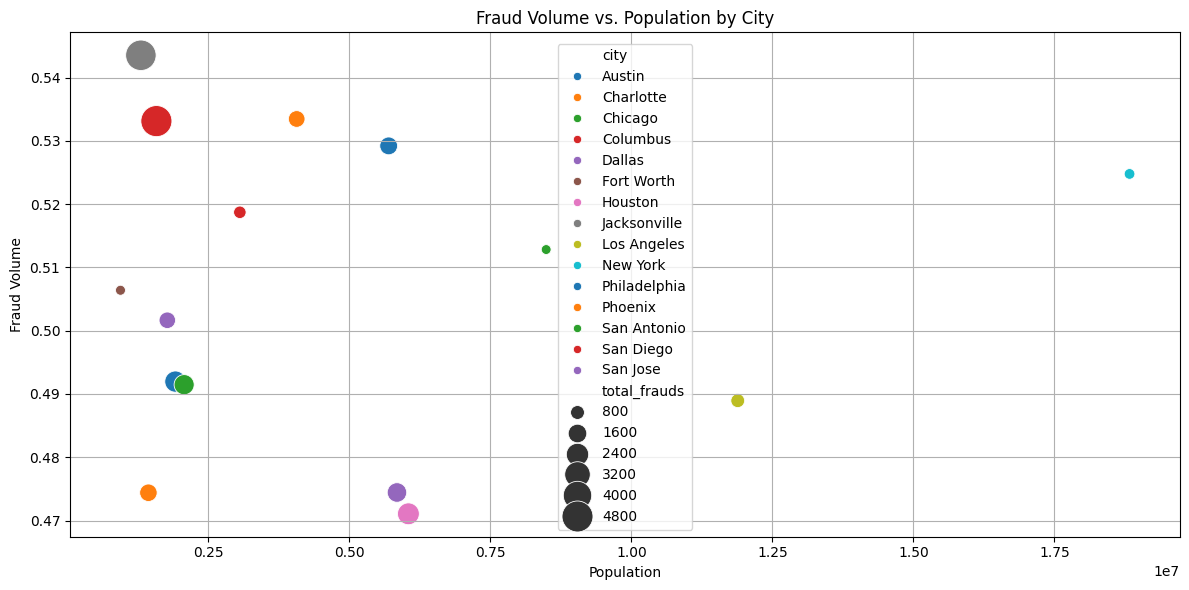

In [20]:
city_summary['fraud_rate'] = city_summary['total_frauds'] / city_summary['total_transactions']

plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=city_summary,
    x='population',
    y='fraud_rate',
    hue='city',
    size='total_frauds',
    sizes=(50, 500),
    palette='tab10',
    legend=True
)
plt.title('Fraud Volume vs. Population by City')
plt.xlabel('Population')
plt.ylabel('Fraud Volume')
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipython-input-30-2894804631.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(city_summary['city'], rotation=45)


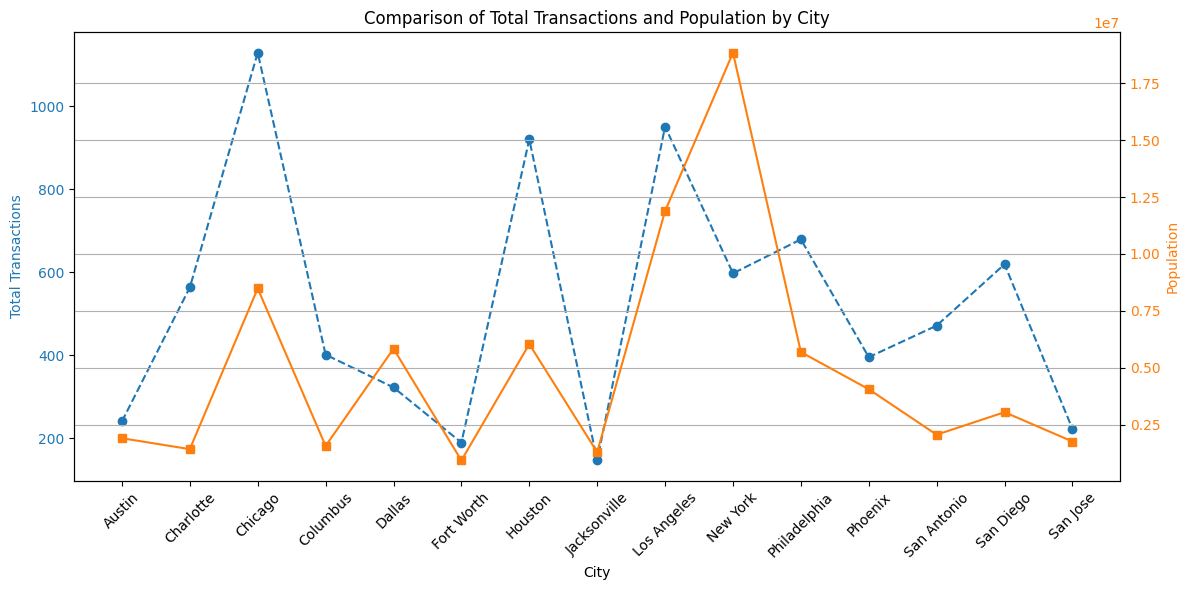

In [30]:
np.random.seed(42)
city_summary['transaction_count'] = (city_summary['population'] / 50000 + np.random.randint(100, 1000, size=len(city_summary))).astype(int)

fig, ax1 = plt.subplots(figsize=(12, 6))
color = 'tab:blue'
ax1.set_xlabel('City')
ax1.set_ylabel('Total Transactions', color=color)
ax1.plot(city_summary['city'], city_summary['transaction_count'], marker='o', linestyle='--', color=color, label='Total Transactions')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(city_summary['city'], rotation=45)

ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Population', color=color)
ax2.plot(city_summary['city'], city_summary['population'], marker='s', linestyle='-', color=color, label='Population')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Comparison of Total Transactions and Population by City')
fig.tight_layout()
plt.grid(True)
plt.show()
